In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls "/content/gdrive/MyDrive/ml-100k" 

allbut.pl  u1.base  u2.test  u4.base  u5.test  ub.base	u.genre  u.occupation
mku.sh	   u1.test  u3.base  u4.test  ua.base  ub.test	u.info	 u.user
README	   u2.base  u3.test  u5.base  ua.test  u.data	u.item


In [ ]:
import torch
import pandas as pd
import torch.nn.functional as F
import matplotlib.pyplot as plt

train = pd.read_csv("/content/gdrive/My Drive/ml-100k/ua.base",
                   sep="\t", names=['user', 'movie', 'rating', 'timestamp'])
test = pd.read_csv("/content/gdrive/My Drive/ml-100k/ua.test",
                  sep="\t", names=['user', 'movie', 'rating', 'timestamp'])

items = torch.LongTensor(train['movie'])
users = torch.LongTensor(train['user'])
ratings = torch.FloatTensor(train['rating'])
items_test = torch.LongTensor(test['movie'])
users_test = torch.LongTensor(test['user'])
ratings_test = torch.FloatTensor(test['rating'])

In [ ]:
rank = 10
numItems = items.max() + 1
numUsers = users.max() + 1
P = torch.randn(numItems, rank, requires_grad=True)
Q = torch.randn(numUsers, rank, requires_grad=True)

In [ ]:
# 기본 Matrix Factorization 구현
optimizer = torch.optim.Adam([P, Q], lr= 0.1)

X = []
Y = []
for epoch in range(1001):
  hypothesis = torch.sum(P[items] * Q[users], dim=1) 
  cost = F.mse_loss(hypothesis ,ratings)

  with torch.no_grad():
    X.append(epoch)
    Y.append(cost)

    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    if epoch % 100 == 0:
      print("epoch: {}, cost: {:.6f}".format(epoch, cost.item()))

epoch: 0, cost: 23.595026
epoch: 100, cost: 0.568119
epoch: 200, cost: 0.497928
epoch: 300, cost: 0.475139
epoch: 400, cost: 0.464106
epoch: 500, cost: 0.457644
epoch: 600, cost: 0.452870
epoch: 700, cost: 0.449603
epoch: 800, cost: 0.447336
epoch: 900, cost: 0.445621


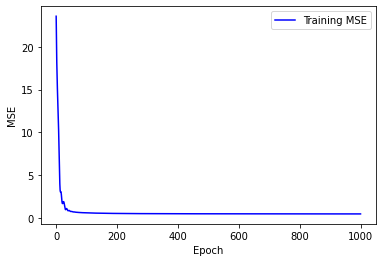

In [ ]:
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE")
plt.legend()
plt.show()

In [ ]:
X = []
Y = []
Y_test = []

for epoch in range(1001):
  hypothesis = torch.sum(P[items] * Q[users], dim=1) 
  cost = F.mse_loss(hypothesis ,ratings)

  optimizer.zero_grad()
  cost.backward()
  optimizer.step()

  with torch.no_grad():
    X.append(epoch) 
    Y.append(cost.item())

    hypo_test = torch.sum(P[items_test] * Q[users_test], dim=1)
    cost_test = F.mse_loss(hypo_test, ratings_test)
    Y_test.append(cost_test.item())
  if epoch % 100 == 0:
    print(f"epoch: {epoch}, cost: {cost.item():.6f}, cost test: {cost_test.item()}")

epoch: 0, cost: 0.913753, cost test: 1.3956024646759033
epoch: 100, cost: 0.877107, cost test: 1.3159089088439941
epoch: 200, cost: 0.847011, cost test: 1.253370761871338
epoch: 300, cost: 0.822235, cost test: 1.2039116621017456
epoch: 400, cost: 0.801707, cost test: 1.164359450340271
epoch: 500, cost: 0.784555, cost test: 1.1323833465576172
epoch: 600, cost: 0.770108, cost test: 1.106317162513733
epoch: 700, cost: 0.757859, cost test: 1.0849498510360718
epoch: 800, cost: 0.747419, cost test: 1.0673710107803345
epoch: 900, cost: 0.738475, cost test: 1.0528713464736938
epoch: 1000, cost: 0.730771, cost test: 1.0408858060836792


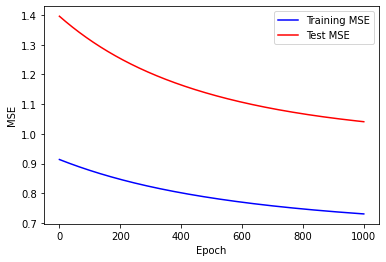

In [ ]:
plt.ylabel("MSE")
plt.xlabel("Epoch")
plt.plot(X,Y, c="blue", label="Training MSE") 
plt.plot(X,Y_test, c="red", label="Test MSE") 
plt.legend()
plt.show()

In [ ]:
lambda1 = 0.0001
lambda2 = 0.0001
for epoch in range(1000):
  hypothesis = torch.sum(P[items] * Q[users], dim=1)
  cost = F.mse_loss(hypothesis ,ratings)
  loss = cost + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q ** 2)
  
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()
  if epoch % 100 == 0:
      print("epoch: {}, cost: {:.6f}".format(epoch, cost.item()))

epoch: 0, cost: 0.730699
epoch: 100, cost: 0.765333
epoch: 200, cost: 0.779795
epoch: 300, cost: 0.785802
epoch: 400, cost: 0.787821
epoch: 500, cost: 0.787745
epoch: 600, cost: 0.786490
epoch: 700, cost: 0.784527
epoch: 800, cost: 0.782041
epoch: 900, cost: 0.778670


In [ ]:
lambda3 = 0.001
lambda4 = 0.001
bias_item = torch.randn(numItems, requires_grad=True)
bias_user = torch.randn(numUsers, requires_grad=True)
mean = (ratings.sum() / len(ratings)).item()
optimizer = torch.optim.Adam([P, Q, bias_item, bias_user], lr=0.1)
hypothesis = torch.sum(P[items] * Q[users], dim=1) + mean + bias_item[items] + bias_user[users]
loss = cost + lambda1 * torch.sum(P ** 2) + lambda2 * torch.sum(Q ** 2) + lambda3 * torch.sum(bias_item ** 2) + lambda4 * torch.sum(bias_user ** 2)